In [1]:
%load_ext autoreload
%autoreload 2

# %config InlineBackend.figure_formats = ['svg']

from IPython.display import display, Markdown

import sys, os
sys.path.insert(0, '../py_scripts')

import numpy as np
import scipy as sp
import pandas as pd
import numpy.random as rand
import scipy.stats as stats


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time
import glob
import pickle

import push_pull as pp
import noise_models as noise
import thermo_models as thermo

import fig_plot as fplot
import model_fitting as fit

sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':False})

This file uses the model parameters found from fitting to predict the antibody distributions for the phosphorylated substrate.

In [2]:
# label = "21_10_15_highgating"
label = "21_10_15_medhighgating"
# label = "22_01_20"
# label = "22_01_20_noGFPexpressionshift"




df_dataset_key = pd.read_csv("../data/"+label+"/model_params.csv", sep=',', engine='python', index_col='exp_name')

display(df_dataset_key)

,file_name,model,kinase_variant,kinase_zipper,pptase_variant,pptase_zipper,substrate_col,phospho_col,kinase_col,pptase_col,bg_phospho_rate,kinase_phospho_rate,kinase_binding_affinity,pptase_dephospho_rate,pptase_binding_affinity
exp_name,,,,,,,,,,,,,,,
substrate_only,127,substrate_only,NaN,NaN,NaN,NaN,ST,SpT,WT,NaN,0.021634,NaN,NaN,NaN,NaN
non-pplatable,174,non-pplatable,174,L+A,NaN,NaN,ST,SpT,WT,NaN,NaN,NaN,NaN,NaN,NaN
kinase_dead,421,push,kinase_dead,L+A,NaN,NaN,ST,SpT,WT,NaN,0.021634,0.000005,1.445177e-01,NaN,NaN
kinase_non-binding,RR+A,push,kinase_wt,kinase_non-binding,NaN,NaN,ST,SpT,WT,NaN,0.021634,10.000000,2.451159e+06,NaN,NaN
kinase_variant_375,375,push,375,L+A,NaN,NaN,ST,SpT,WT,NaN,0.021634,0.043799,1.445177e-01,NaN,NaN
kinase_variant_419,419,push,419,L+A,NaN,NaN,ST,SpT,WT,NaN,0.021634,0.431063,1.445177e-01,NaN,NaN
kinase_zipper_E+A,E+A,push,kinase_wt,E+A,NaN,NaN,ST,SpT,WT,NaN,0.021634,10.000000,4.006144e+01,NaN,NaN
kinase_zipper_E+E,E+E,push,kinase_wt,E+E,NaN,NaN,ST,SpT,WT,NaN,0.021634,10.000000,4.424449e+05,NaN,NaN
kinase_zipper_L+A,L+A,push,kinase_wt,L+A,NaN,NaN,ST,SpT,WT,NaN,0.021634,10.000000,1.445177e-01,NaN,NaN


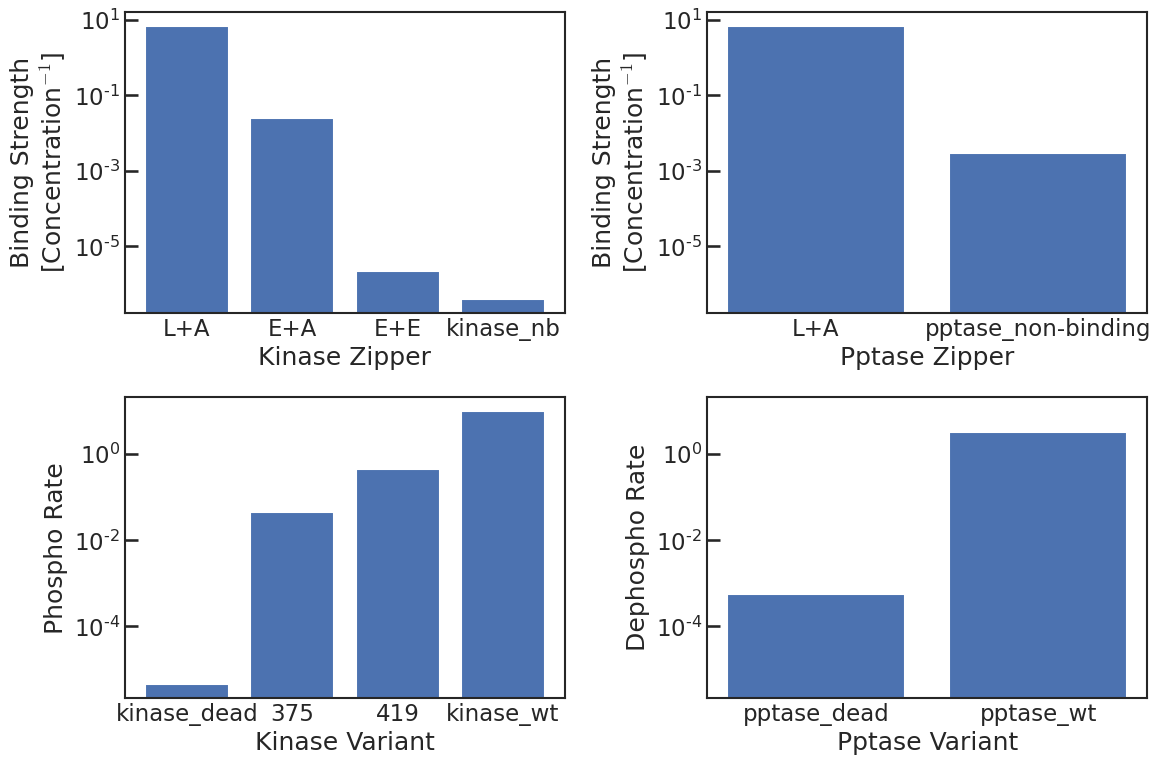

In [3]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2, sharey=ax1)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4, sharey=ax3)


ax = ax1

df_sub = df_dataset_key.query("model=='push'").drop_duplicates('kinase_zipper').sort_values('kinase_binding_affinity').replace({"kinase_non-binding": 'kinase_nb'})

ax.bar(df_sub['kinase_zipper'], 1/df_sub['kinase_binding_affinity'])

ax.set_yscale('log')
ax.set_xlabel("Kinase Zipper")
ax.set_ylabel("Binding Strength\n[Concentration$^{-1}$]")

ax = ax2

df_sub = df_dataset_key.query("model=='pushpull'").drop_duplicates('pptase_zipper').sort_values('pptase_binding_affinity').replace({"kinase_non-binding": 'pptase_nb'})

ax.bar(df_sub['pptase_zipper'], 1/df_sub['pptase_binding_affinity'])

ax.set_yscale('log')
ax.set_xlabel("Pptase Zipper")
ax.set_ylabel("Binding Strength\n[Concentration$^{-1}$]")



ax = ax3

df_sub = df_dataset_key.query("model=='push'").drop_duplicates('kinase_variant').sort_values('kinase_phospho_rate')

ax.bar(df_sub['kinase_variant'], df_sub['kinase_phospho_rate'])

ax.set_yscale('log')
ax.set_xlabel("Kinase Variant")
ax.set_ylabel("Phospho Rate")




ax = ax4

df_sub = df_dataset_key.query("model=='pushpull'").drop_duplicates('pptase_variant').sort_values('pptase_dephospho_rate')

ax.bar(df_sub['pptase_variant'], df_sub['pptase_dephospho_rate'])

ax.set_yscale('log')
ax.set_xlabel("Pptase Variant")
ax.set_ylabel("Dephospho Rate")


plt.tight_layout()

plt.show()

In [4]:
df_data = pd.read_csv("../data/"+label+"/model_predictions.csv", sep=',', index_col=[0, 1])
display(df_data)

df_anti2GFP_key = pd.read_csv("../data/"+label+"/anti_to_GFP_key.csv", sep=', ', engine='python').set_index("component")
display(df_anti2GFP_key)

df_anti_noGFP2GFP_key = pd.read_csv("../data/"+label+"/anti_noGFP_to_GFP_key.csv", sep=', ', engine='python').set_index("component")
display(df_anti_noGFP2GFP_key)

df_phospho_empty = pd.read_csv("../data/{}/{}.csv".format(label, df_anti2GFP_key.loc['empty_phospho', 'file_name']))
empty_vals = df_phospho_empty[df_anti2GFP_key.loc['empty_phospho', 'anti_col_name']].values
empty_vals = empty_vals[empty_vals > 0.0]

df_phospho_active = pd.read_csv("../data/{}/{}.csv".format(label, df_anti2GFP_key.loc['phospho', 'file_name']))
active_vals_wGFP = df_phospho_active[df_anti2GFP_key.loc['phospho', 'anti_col_name']].values
active_vals_wGFP = active_vals_wGFP[active_vals_wGFP > 0.0]


df_phospho_active = pd.read_csv("../data/{}/{}.csv".format(label, df_anti_noGFP2GFP_key.loc['phospho', 'file_name']))
active_vals = df_phospho_active[df_anti_noGFP2GFP_key.loc['phospho', 'anti_col_name']].values
active_vals = active_vals[active_vals > 0.0]



substrate_anti_exp  phospho_anti_exp  \
exp_name       cell_index                                         
substrate_only 0                  2212.525146        133.354218   
               1                  4954.513184        112.124626   
               2                  3487.114746        119.673706   
               3                   253.888428        100.082169   
               4                   584.118408         39.466415   
...                                       ...               ...   
pptase         15453               605.925781        116.375717   
               15454              3005.479980          3.798526   
               15455               140.026718        260.147644   
               15456               174.096863        169.258682   
               15457               363.897980        246.208633   

                           kinase_anti_exp  pptase_anti_exp  \
exp_name       cell_index                                     
substrate_only 0                 79.178284     1.000000e-08   
               1                 86.252625     1.000000e-08   
               2                 10.157516     1.000000e-08   
               3                 96.854454     1.000000e-08   
               4                118.221375     1.000000e-08   
...                                    ...              ...   
pptase         15453            585.051575     1.200013e+03   
               15454           7184.776367     4.150368e+03   
               15455            658.204529     5.767077e+02   
               15456            372.268127     7.306846e+02   
               15457            529.578430     9.265865e+02   

                           phospho_prob_empty  substrate_prob_empty  \
exp_name       cell_index                                             
substrate_only 0                     0.835467              0.003507   
               1                     0.924583              0.016788   
               2                     0.919016              0.009055   
               3                     0.946850              0.005789   
               4                     0.983930              0.005091   
...                                       ...                   ...   
pptase         15453                 0.928989              0.005091   
               15454                 1.000000              0.006101   
               15455                 0.347379              0.702666   
               15456                 0.669715              0.004919   
               15457                 0.291574              0.004794   

                           kinase_prob_empty  pptase_prob_empty  \
exp_name       cell_index                                         
substrate_only 0                    0.994416           0.000000   
               1                    0.993424           0.000000   
               2                    1.000000           0.000000   
               3                    0.992733           0.000000   
               4                    0.992449           0.000000   
...                                      ...                ...   
pptase         15453                0.010408           0.039166   
               15454                0.000000           0.003252   
               15455                0.010408           0.292457   
               15456                0.453276           0.194159   
               15457                0.010423           0.112482   

                           phospho_GFP_infer  phospho_conc_infer  \
exp_name       cell_index                                          
substrate_only 0                  552.593118          349.705895   
               1                  370.370807          167.483585   
               2                  131.236836            0.000000   
               3                 1588.078290         1385.191068   
               4                  136.507721            0.000000   
...                                      ...                 ..

,file_name,anti_col_name,GFP_col_name
component,,,
empty_substrate,BFP(empty cell),ST,GFP
empty_phospho,BFP(empty cell),SpT,GFP
empty_kinase,BFP(empty cell),WT,GFP
empty_pptase,BFP(empty cell),pptase,GFP
substrate,ST:SpT MOCU,ST,GFP
phospho,ST:SpT MOCU,SpT,GFP
kinase,WT MOCU,WT,GFP
pptase,pptase MOCU,pptase,GFP


,file_name,anti_col_name
component,,
substrate,L+A,ST
phospho,L+A,SpT
kinase,L+A,WT
pptase,with pptase,pptase


KS for empty and activated controls: 0.8781499907742176
KS for empty and activated controls w/ GFP: 0.7615423179241427


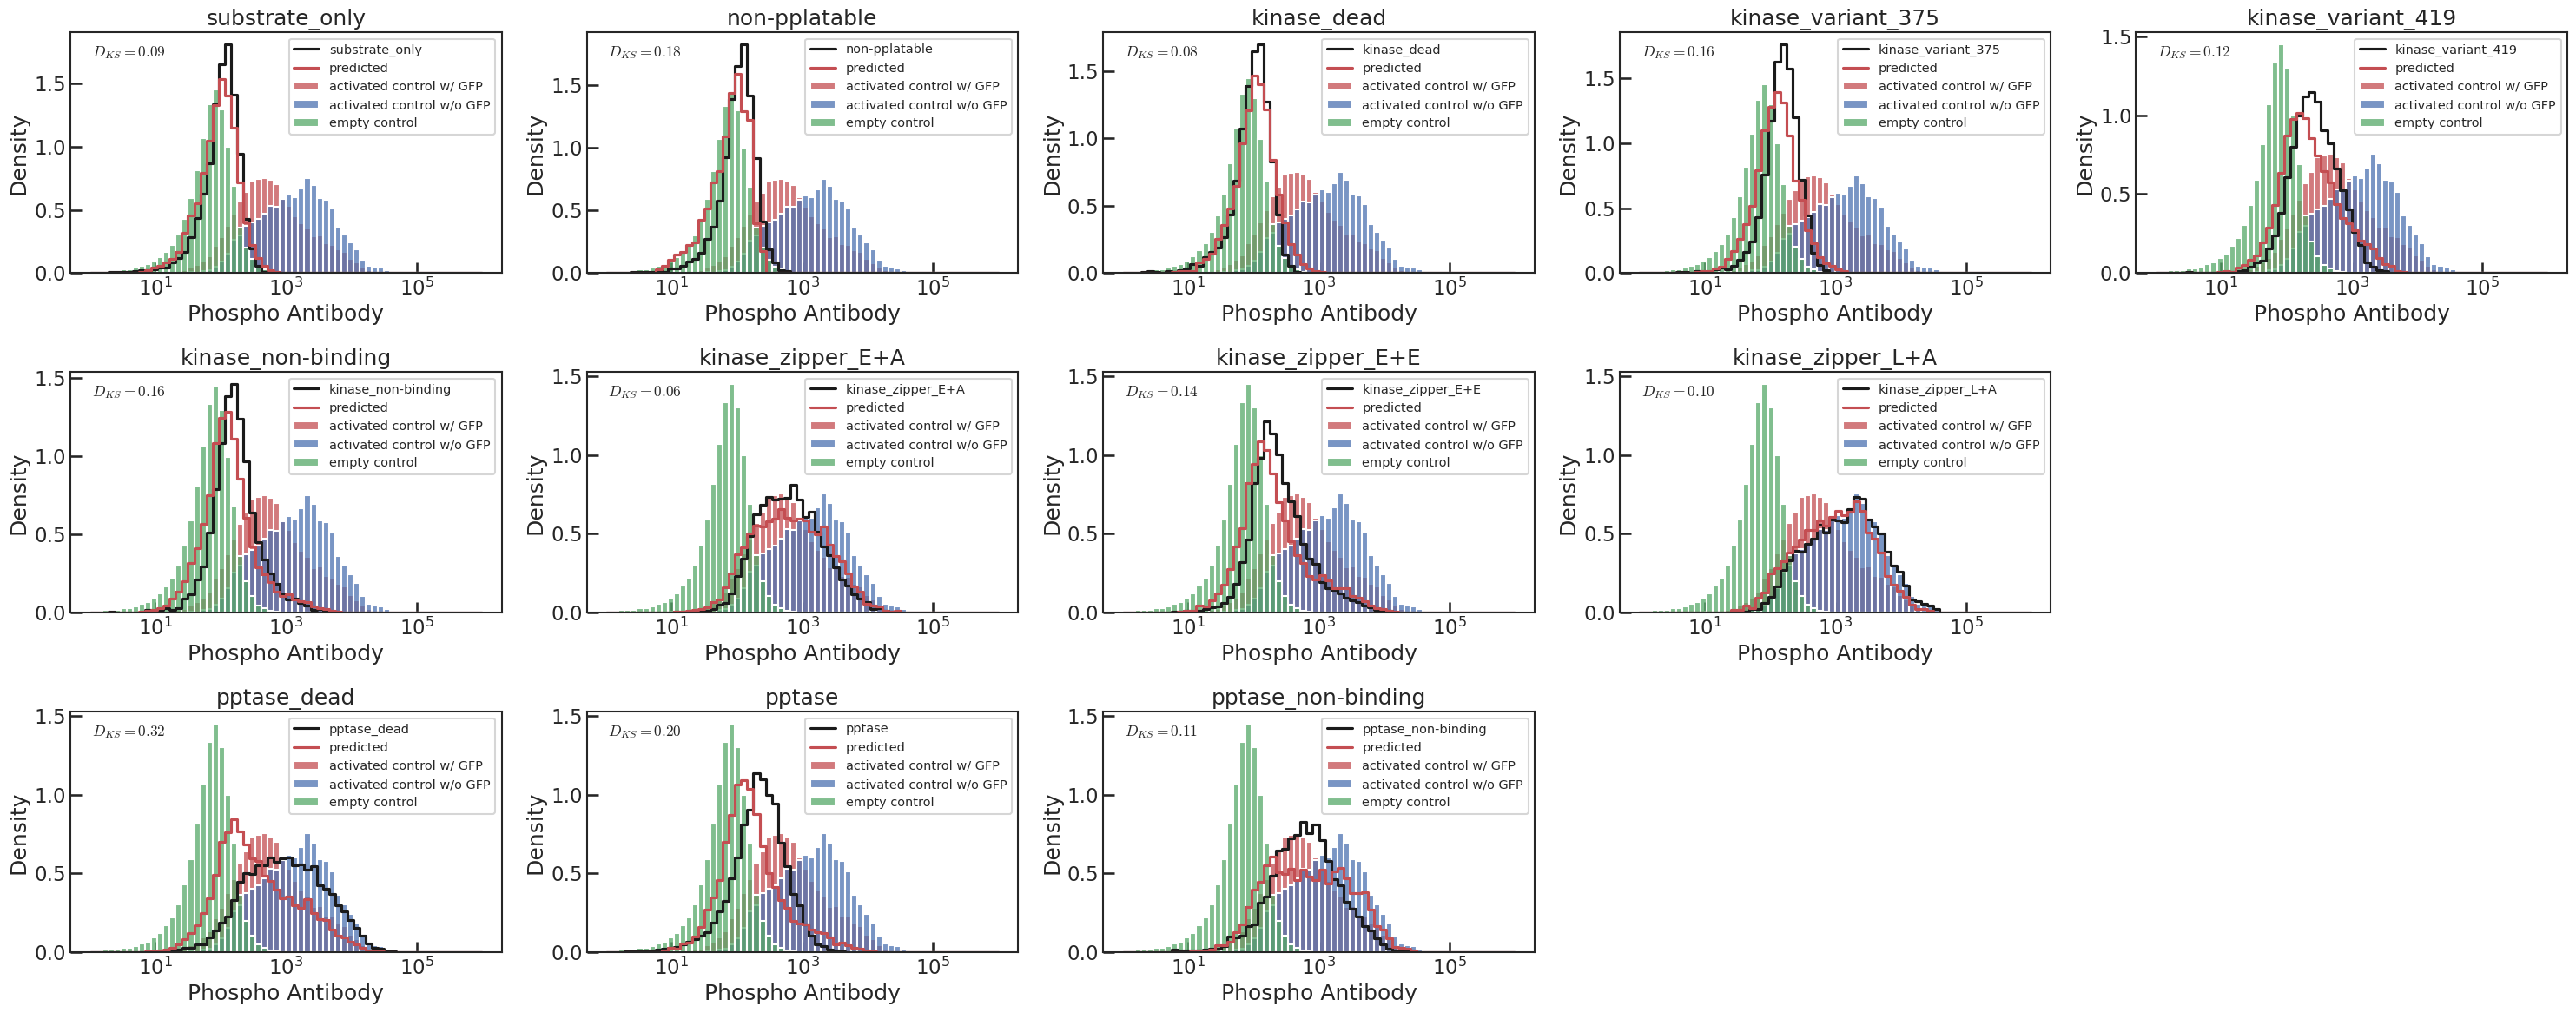

In [5]:

(ks, pval) = stats.ks_2samp(active_vals, empty_vals)

print("KS for empty and activated controls:", ks)

(ks, pval) = stats.ks_2samp(active_vals_wGFP, empty_vals)

print("KS for empty and activated controls w/ GFP:", ks)

binrange = (0, 6)

fig = plt.figure(figsize=(30, 12))

# which data set to put on each axis
ax_dict = {'substrate_only': 1, 'non-pplatable': 2, 'kinase_dead': 3, 'kinase_variant_375': 4, 'kinase_variant_419': 5,
          'kinase_non-binding': 6, 'kinase_zipper_E+A': 7, 'kinase_zipper_E+E': 8, 'kinase_zipper_L+A': 9, 
           'pptase_dead': 11, 'pptase': 12, 'pptase_non-binding': 13}


for exp_name, row in df_dataset_key.iterrows():
        
    df_tmp = df_data.query("exp_name==@exp_name").dropna()
    
    ax = fig.add_subplot(3, 5, ax_dict[exp_name])
    
    ax.set_title(exp_name)
        
    sns.histplot(df_tmp['phospho_anti_exp'], binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label=exp_name, element='step', fill=False, color='k', stat='density')
    sns.histplot(df_tmp['phospho_anti_predict'], binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='predicted', element='step', fill=False, color='r', stat='density')
    sns.histplot(active_vals_wGFP, binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='activated control w/ GFP', color='r', stat='density')
    sns.histplot(active_vals, binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='activated control w/o GFP', color='b', stat='density')
    sns.histplot(empty_vals, binrange=binrange, log_scale=True, bins=64, ax=ax, 
                 label='empty control', color='g', stat='density')

    ax.set_xlabel("Phospho Antibody")

    ax.legend(loc='upper right', fontsize='xx-small')
        
#     ax.set_yscale('log')

    (ks, pval) = stats.ks_2samp(df_tmp['phospho_anti_exp'], df_tmp['phospho_anti_predict'])
        
#     MSE = np.sum((np.log10(df_tmp['SpT_GFP_infer'])-np.log10(df_tmp['SpT_GFP_predict']))**2)
#     var = np.sum((np.log10(df_tmp['SpT_GFP_infer'])-np.log10(df_tmp['SpT_GFP_infer']).mean())**2)
#     R2 = 1 - MSE/var
        
    ax.text(0.05, 0.95, r"$D_{{KS}}={:.2f}$".format(ks), transform=ax.transAxes, fontsize='x-small', ha='left', va='top')
        
    
    df_dataset_key.loc[exp_name, 'KS_stat'] = ks
#     df_dataset_key.loc[exp_name, 'R2_stat'] = R2
    
plt.tight_layout()

plt.show()


In [6]:
df_dataset_key.to_csv("../data/"+label+"/model_params.csv", sep=',')